<a href="https://colab.research.google.com/github/RahulJuluru2/Unit1ClassPractice/blob/main/B19svmFeature29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
df = pd.DataFrame(data = iris.data,columns=iris.feature_names)
df['species'] = iris.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
x = df.iloc[:,0:4]
y = df.iloc[:,4:]

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
importances = mutual_info_classif(x,y.values.ravel())

In [ ]:
feat_importances = pd.Series(importances,df.columns[0:len(df.columns)-1])

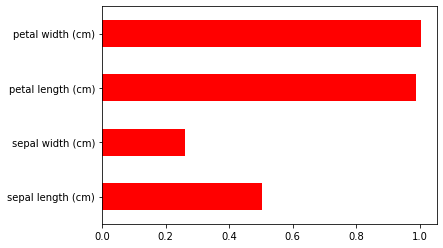

In [ ]:
feat_importances.plot(kind='barh',color='red')
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
chi2_feature = SelectKBest(chi2,k=3)

In [ ]:
x_best = chi2_feature.fit_transform(x,y)

In [ ]:
print(x.shape[1])
print(x_best.shape[1])

4
3


In [ ]:
filter = chi2_feature.get_support()

In [ ]:
features = np.array(iris.feature_names)

In [ ]:
print("All features:")
print(features)
 
print("Selected best 3:")
print(features[filter])
#print(x_best) 

All features:
['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
Selected best 3:
['sepal length (cm)' 'petal length (cm)' 'petal width (cm)']


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(3)
selector.fit(df)
df.columns[selector.get_support()]

Index(['petal length (cm)'], dtype='object')

In [ ]:
#Univariate Feature Selection with SelectKBest
from sklearn.feature_selection import SelectKBest, mutual_info_classif
#Select top 2 features based on mutual info regression
selector3 = SelectKBest(mutual_info_classif, k =3)
selector3.fit(x, y)
x.columns[selector3.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [ ]:
#Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
rfe_selector = RFE(estimator=SVC(kernel='linear'),n_features_to_select = 2, step = 1)
rfe_selector.fit(x, y)
x.columns[rfe_selector.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [ ]:
from sklearn.feature_selection import SelectFromModel
# #Selecting the Best important features according to Logistic Regression using SelectFromModel
sfm_selector = SelectFromModel(estimator=SVC(kernel='linear'))
sfm_selector.fit(x, y.values.ravel())
x.columns[sfm_selector.get_support()]

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
#Selecting the Best important features according to Logistic Regression
sfs_selector = SequentialFeatureSelector(estimator=SVC(kernel='linear'), n_features_to_select = 2, cv =10, direction ='backward')
sfs_selector.fit(x, y.values.ravel())
x.columns[sfs_selector.get_support()]

Index(['sepal length (cm)', 'petal width (cm)'], dtype='object')